<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#273746; border:1; color: white;' role="tab" aria-controls="home"><center>Análisis de Segmentación de Clientes de la Empresa Oxford - Perú</center></h1>

<left>**Fecha: 13-12-2024**</left>


# <font color="#ba4a00"><strong>Análisis de Segmentación de Clientes en comercio electrónico - RETAIL</font>
<hr color="#F5F5F5" size="1">

<img align="right" width="240" height="240" src="https://montenbaik.com/wp-content/uploads/2011/09/logo-MTBAik-ENDURO-2011-ox-03.jpg">

En este notebook se ha realizado el trabajo de segmentación de clientes, desde Enero 2015 hasta Enero 2018 para la tienda **[Oxford Perú](https://www.oxfordstore.pe/)** para realizar un análisis descriptivo del comportamiento de sus clientes y poder proyectarlos hasta la actualidad, es preciso mencionar que los datos fueron brindados de manera no oficial (personal de amistad).

**Elaborado Por: [Econ. Mag. Enrique F. Gutierrez Rivasplata](https://github.com/EnriqueGRivas/Analisis_Bluex/tree/main/PP1)**


## <img align="left"  width="240" height="120" src="https://www.solusoft.es/Info/Imagenes/logo_proyecta.png"> 

<hr color="#F5F5F5" size="2"> 


El Análisis del **[Proyecto Bluex](https://github.com/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/4_Segmentaci%C3%B3n_de_Clientes_Parte_2.ipynb)** se hizo pensando en el proyecto realizado para la empresa **[Blue Express Perú](https://www.blue.cl/home/)** en un estudio de segmentación de clientes mediante el análisis de RFM. El propósito de este proyecto es análizar que tanto las transacciones del e-commerce es competitiva frente a otros canales de ventas, abriendo oportunidades para futuros mayoristas.

<div style="display:inline-block;vertical-align:top;">
<h2>Contenido:</h2>
<ul>
    <li><a href="#contexto-proyecto">Acerca del contexto del Proyecto</a></li>
    <li><a href="#descripcion-variables">Descripción de las variables del conjunto de datos (Dataset)</a></li>
     <li><a href="#importar-dataset">Importar Dataset</a></li>
    <li><a href="#limpiar-dataset">Comprender y limpiar el Dataset</a></li>
     <li><a href="#analisis-metricas">Análisis de métricas de ventas</a></li>
     <li><a href="#analisis-cohorte">Análisis de Cohorte</a></li>
    <li><a href="#segmentacion">Segmentación de clientes mediante RFM</a></li>
     <li><a href="#recomendaciones">Recomendaciones para productos de Lima</a></li>
     <li><a href="#referencias">Referencias</a></li>
</ul>
</div>

<a id='contexto-proyecto'></a>
# <font color="#ba4a00"><strong>Acerca del contexto del Proyecto</font>
<hr color="#F5F5F5" size="1">

### Realizar segmentación de clientes mediante la metodología RFM para comercio electrónico.

En este proyecto se debe realizar un análisis descriptivo que mostrará al gerente general de la empresa <strong>Oxford-Perú</strong>, una tienda minorista con sede en Lima, qué tan bien o mal van las ventas en su empresa.

- Oxford es una marca reconocida a nivel nacional por su amplia gama de bicicletas diseñadas para satisfacer las necesidades de diversos ciclistas. Con presencia en el mercado peruano, Oxford se ha posicionado como una excelente opción para quienes buscan una bicicleta de calidad, diseño atractivo y durabilidad. 
- Oxford ha estado presente en Perú por más de 10 años, ofreciendo sus productos y servicios a los amantes del ciclismo. 
- Una de las claves de su éxito fue la adquisición de la marca peruana Goliat, una marca tradicional con un gran reconocimiento en el mercado local. Esta adquisición les permitió fortalecer su posición y llegar a un público más amplio. 
- A lo largo de estos años, Oxford ha experimentado un crecimiento constante, ampliando su red de distribución y diversificando su oferta de productos.

Para este análisis debemos medir la participación del cliente basándose en un <mark><b>análisis de cohorte</b></mark> y realizar una <mark><b>Segmentación de clientes aplicando la metodología RFM</b></mark>, para que el negocio pueda enfocar sus esfuerzos y adoptar diferentes estrategias para cada segmento, además de realizar una limpieza y procesamiento de datos previo a esto.

<div class="alert alert-info"> 
<strong><div style="color: 0gb00,00, 0);">📌 Los principales objetivos de aprendizaje de este proyecto: </div></strong> <br>
<div style="color: 0gb00,00, 0);">→ Realizar limpieza y procesamiento de datos.</div>
<div style="color: 0gb00,00, 0);">→ Realizar un análisis de Cohorte.</div>
<div style="color: 0gb00,00, 0);">→ Realizar la segmentación de clientes utilizando el modelo RFM y</div>
<div style="color: 0gb00,00, 0);">→ Desarrollar Visualizaciones.</div>
</div>

<a id='descripcion-variables'></a>
# <font color="#ba4a00"><strong>Descripción de las variables del Dataset</font>
<hr color="#F5F5F5" size="1">

| Variables | Descripción |
| --- | --- |
| **Orden_Servicio (OS)** | Un número asignado de forma única a cada transacción. |
| **Fecha** | Fecha de la factura u OS, día en que se generó la transacción. |
| **Cod_Cliente** | Número de clientes. Un número completo de 7 dígitos alfa numerico, asignado exclusivamente a cada cliente.|
| **Distrito_cliente** | El nombre del distrito donde reside cada cliente.|
| **Cantidad** | Las cantidades de cada producto (artículo) por transacción enviadas. |
| **Ingreso_Total** | Valor de la factura expresada en soles. |

<a id='analisis-cohorte'></a>
# <font color="#ba4a00"><strong>Análisis de Cohorte </font>
<hr color="#F5F5F5" size="1">

Ahora, crearemos una función que calcule la cohorte y devuelva el dataframe generado.

## ¿Qué es el análisis de cohortes?

En estadística, un cohorte es un **grupo de personas** que tienen en común un **evento que tuvo lugar en el mismo periodo**.

Analizar el comportamiento y desempeño de grupos de clientes que tienen atributos comunes ayuda en las estrategias que se deben adoptar. Por ejemplo, todos los clientes con la misma fecha de adquisición pertenecen al mismo cohorte.

Para este estudio organizaremos **clientes en grupos de fechas de adquisición** y analizaremos el comportamiento de estos grupos según métricas como **retención de clientes**, exclusivamente.

### **Periodo de Prueba:**

In [79]:
# Obteniendo las transacciones del Periodo 01-06-2021 al 01-06-2022
# ==============================================================================
oxford = ecommerce[(ecommerce['Fecha'] >='2021-06-01') & (ecommerce['Fecha'] <='2022-06-01')]
#oxford.head()

In [81]:
# Obteniendo los preiodos del Cohort
# ==============================================================================
oxford['orden_mes'] = oxford['Fecha'].dt.to_period('M')
oxford['cohort'] = oxford.groupby('Cod_Cliente')['Fecha'] \
                 .transform('min') \
                 .dt.to_period('M')

In [83]:
# Agrupando periodos
# ==============================================================================
df_cohort = oxford.groupby(['cohort', 'orden_mes']) \
              .agg(n_customers=('Cod_Cliente', 'nunique')) \
              .reset_index(drop=False)
df_cohort['numero_periodo'] = (df_cohort.orden_mes - df_cohort.cohort).apply(attrgetter('n'))

In [85]:
# Realizando un Pivot con las nuevas variables
# ==============================================================================
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'numero_periodo',
                                     values = 'n_customers')

In [87]:
# Matriz de retención del Cohorte
# ==============================================================================
cohort_size = cohort_pivot.iloc[:,0]
retencion_matrix = cohort_pivot.divide(cohort_size, axis = 0)

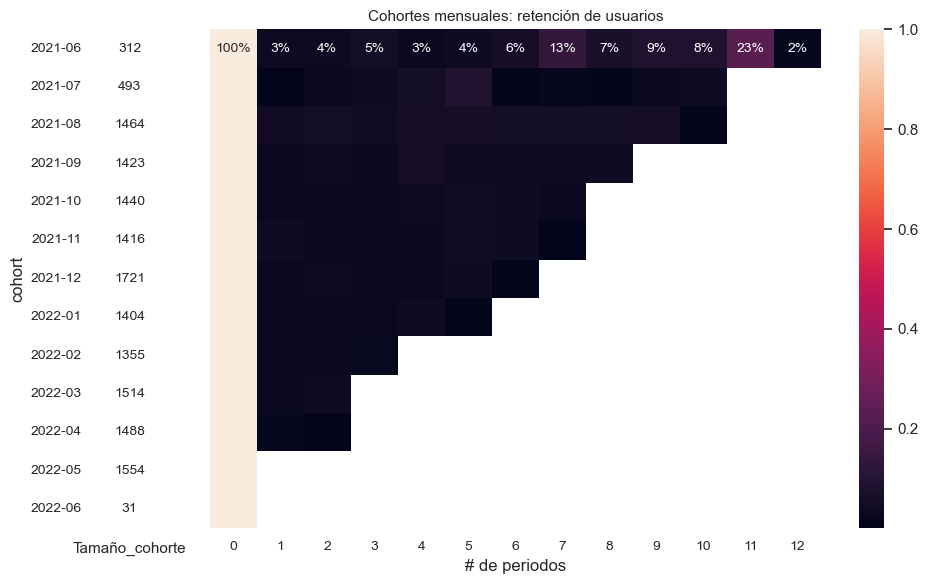

In [89]:
# Definiendo una función para asignar períodos existentes
# ==============================================================================
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Matriz de retención
    sns.heatmap(retencion_matrix, 
                mask=retencion_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='rocket', 
                ax=ax[1],
                annot_kws={"size": 10}) # Reduce el tamaño de los porcentajes
    ax[1].set_title('Cohortes mensuales: Retención de usuarios Totales', fontsize=11)
    ax[1].set(xlabel='# de periodos',
              ylabel='')
    ax[1].tick_params(axis='x', labelsize=10) # Reduce el tamaño de las letras del eje x
    ax[1].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y


    # Tamaño de cohorte
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamaño_cohorte'})
    
    white_cmap = mcolors.ListedColormap(['white'])
    
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0],
                annot_kws={"size": 10}) # Reduce el tamaño de los números en el tamaño del cohort
    ax[0].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y en el tamaño del cohort

    fig.tight_layout()

Imaginemos que este gráfico es como un tablero de juego donde cada fila representa un grupo de clientes que compraron por primera vez en el mismo mes (una "cohorte"). Las columnas muestran cuánto tiempo ha pasado desde su primera compra (en meses o "periodos").

**Los números dentro del tablero representan el porcentaje de clientes de cada cohorte que volvieron a comprar en un periodo determinado.**

Vamos a ver la primera fila (la primera cohorte):

- **Periodo 0 (100%):** Esto significa que en el mes inicial, todos los clientes de esa cohorte hicieron una compra (¡obvio, porque es su primera compra!).
- **Periodo 1 (3%):** De todos los clientes que compraron por primera vez en ese mes, solo el 3% volvió a comprar el siguiente mes.
- **Periodo 2 (4%):** El 4% de la cohorte inicial volvió a comprar dos meses después de su primera compra.
- **Y así sucesivamente**...

Ahora, vamos a ver qué pasa con las otras cohortes:

La idea es seguir el mismo patrón: mirar el porcentaje de clientes de cada cohorte que regresaron a comprar en cada periodo.
En la segunda cohorte (segunda fila), vemos que en el periodo 0 tienen un 100% (su primera compra). En el periodo 1, solo el 3% el  regresó, y en el periodo 2, el 4%, y así sucesivamente.
í sucesivamente.

**Interpretación general:**

- **Si los porcentajes se mantienen altos a lo largo de los periodos, significa que estás reteniendo bien a tus clientes**. Es decir, que vuelven a comprar después de su primera compra.
- **Si los porcentajes bajan rápidamente, significa que hay un problema de retención**. Los clientes no están volviendo a comprar, y debes investigar por qué.

**En resumen:** El gráfico de retención de cohortes te ayuda a entender cómo se comportan tus clientes a lo largo del tiempo y si estás logrando que vuelvan a comprar.

**Analogía:**

Imagina que tienes un equipo de fútbol. Cada fila del gráfico es como una temporada nueva, y cada columna es un partido. Los porcentajes te dicen cuántos de tus jugadores originales (de la primera temporada) siguen jugando en cada partido.

In [91]:
# Agrupando y contando clientes únicos
# ==============================================================================
cohortes_df = pd.DataFrame(oxford.groupby(['Year_mes'])['Cod_Cliente'].nunique()).reset_index()
cohortes_df.columns = ['Year_mes', 'Total_clientes']

# Calculando nuevos clientes (igual que antes)
# ==============================================================================
cohortes_df['Nuevos_clientes'] = cohortes_df['Total_clientes'] - cohortes_df['Total_clientes'].shift(1, fill_value=0)

# Calculate retention rates
# ==============================================================================
cohortes_retencion_df = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohortes_retencion_df = cohortes_retencion_df.reset_index() # Restablecer el índice para convertir la 'cohorte' en una columna normal

cohortes_df

,Year_mes,Total_clientes,Nuevos_clientes
0,2021-06,312,312
1,2021-07,503,191
2,2021-08,1479,976
3,2021-09,1519,40
4,2021-10,1588,69
5,2021-11,1607,19
6,2021-12,1998,391
7,2022-01,1740,-258
8,2022-02,1701,-39
9,2022-03,1904,203


#### **GUARDAR EL RESULTADO DEL ANALISIS COHORT EN ARCHIVO XLSX:**

In [93]:
# Guardando los resultados del 'retencion_matrix' y/o 'oxford'
# ==============================================================================
analisis_cohort = pd.DataFrame(retencion_matrix)
analisis_cohort.to_excel('Analisis_cohort.xlsx', index=False)

### **Periodo de prueba - Clientes Lima:**

In [95]:
# Obteniendo las transacciones del Periodo 01-06-2021 al 01-06-2022
# ==============================================================================
oxford_li = ecommerce.loc[ecommerce['Tipo_Distrito']=="Lima"] 
oxford_lima = oxford_li[(oxford_li['Fecha'] >='2021-06-01') & (oxford_li['Fecha'] <='2022-06-01')]

In [97]:
# Obteniendo los preiodos del Cohort de la provincia de Lima
# ==============================================================================
oxford_lima['orden_mes'] = oxford_lima['Fecha'].dt.to_period('M')
oxford_lima['cohort'] = oxford_lima.groupby('Cod_Cliente')['Fecha'] \
                 .transform('min') \
                 .dt.to_period('M') 

# Agrupando periodos
# ==============================================================================
df_cohort = oxford_lima.groupby(['cohort', 'orden_mes']) \
              .agg(n_customers=('Cod_Cliente', 'nunique')) \
              .reset_index(drop=False)
df_cohort['numero_periodo'] = (df_cohort.orden_mes - df_cohort.cohort).apply(attrgetter('n'))

# Realizando un Pivot con las nuevas variables
# ==============================================================================
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'numero_periodo',
                                     values = 'n_customers')

# Matriz de retención del Cohorte
# ==============================================================================
cohort_size = cohort_pivot.iloc[:,0]
retencion_matrix_lima = cohort_pivot.divide(cohort_size, axis = 0)

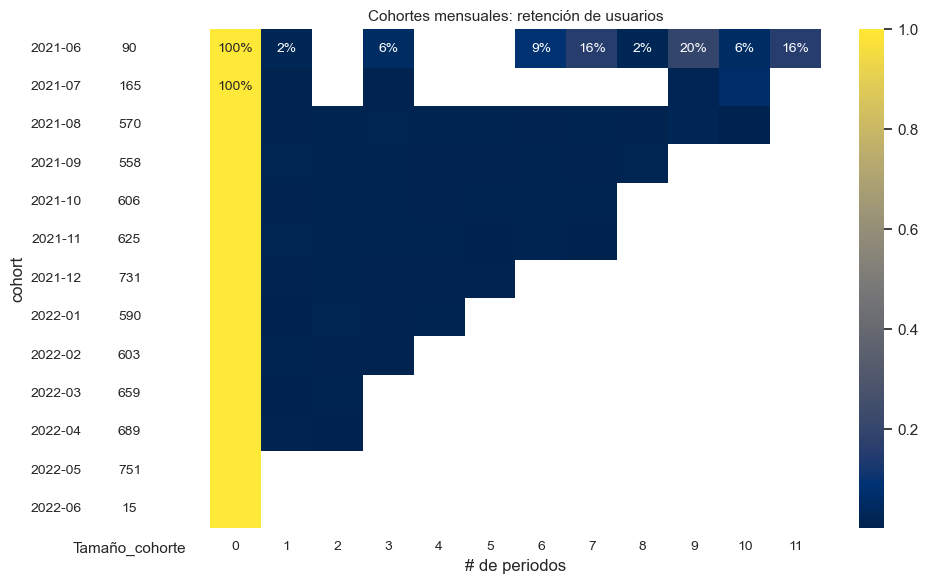

In [99]:
# Definiendo una función para asignar períodos existentes
# ==============================================================================
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Matriz de retención
    sns.heatmap(retencion_matrix_lima, 
                mask=retencion_matrix_lima.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='cividis', 
                ax=ax[1],
                annot_kws={"size": 10}) # Reduce el tamaño de los porcentajes
    ax[1].set_title('Cohortes mensuales: Retención de usuarios en Lima', fontsize=11)
    ax[1].set(xlabel='# de periodos',
              ylabel='')
    ax[1].tick_params(axis='x', labelsize=10) # Reduce el tamaño de las letras del eje x
    ax[1].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y


    # Tamaño de cohorte
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamaño_cohorte'})
    
    white_cmap = mcolors.ListedColormap(['white'])
    
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0],
                annot_kws={"size": 10}) # Reduce el tamaño de los números en el tamaño del cohort
    ax[0].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y en el tamaño del cohort

    fig.tight_layout()

In [101]:
# Agrupando y contando clientes únicos de Lima
# ==============================================================================
cohortes_li_df = pd.DataFrame(oxford_lima.groupby(['Year_mes'])['Cod_Cliente'].nunique()).reset_index()
cohortes_li_df.columns = ['Year_mes', 'Total_clientes']

# Calculando nuevos clientes (igual que antes)
# ==============================================================================
cohortes_li_df['Nuevos_clientes'] = cohortes_li_df['Total_clientes'] - cohortes_li_df['Total_clientes'].shift(1, fill_value=0)

# Calculate retention rates
# ==============================================================================
cohortes_retencion_df_li = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohortes_retencion_df_li = cohortes_retencion_df_li.reset_index() # Restablecer el índice para convertir la 'cohorte' en una columna normal

cohortes_li_df

,Year_mes,Total_clientes,Nuevos_clientes
0,2021-06,90,90
1,2021-07,167,77
2,2021-08,571,404
3,2021-09,568,-3
4,2021-10,621,53
5,2021-11,645,24
6,2021-12,766,121
7,2022-01,633,-133
8,2022-02,634,1
9,2022-03,725,91


### **Periodo de prueba - Clientes Provincia:**

In [176]:
# Obteniendo las transacciones del Periodo 01-06-2021 al 01-06-2022
# ==============================================================================
oxford_pro = ecommerce.loc[ecommerce['Tipo_Distrito']=="Provincia"]
oxford_provincia = oxford_pro[(oxford_pro['Fecha'] >='2021-06-01') & (oxford_pro['Fecha'] <='2022-06-01')]

In [178]:
# Obteniendo los preiodos del Cohort en Provincias
# ==============================================================================
oxford_provincia['orden_mes'] = oxford_provincia['Fecha'].dt.to_period('M')
oxford_provincia['cohort'] = oxford_provincia.groupby('Cod_Cliente')['Fecha'] \
                 .transform('min') \
                 .dt.to_period('M')

# Agrupando periodos
# ==============================================================================
df_cohort2 = oxford_provincia.groupby(['cohort', 'orden_mes']) \
              .agg(n_customers=('Cod_Cliente', 'nunique')) \
              .reset_index(drop=False)
df_cohort2['numero_periodo'] = (df_cohort2.orden_mes - df_cohort2.cohort).apply(attrgetter('n'))

# Realizando un Pivot con las nuevas variables
# ==============================================================================
cohort_pivot = df_cohort2.pivot_table(index = 'cohort',
                                     columns = 'numero_periodo',
                                     values = 'n_customers')

# Matriz de retención del Cohorte
# ==============================================================================
cohort_size2 = cohort_pivot.iloc[:,0]
retencion_matrix_provincia = cohort_pivot.divide(cohort_size2, axis = 0)

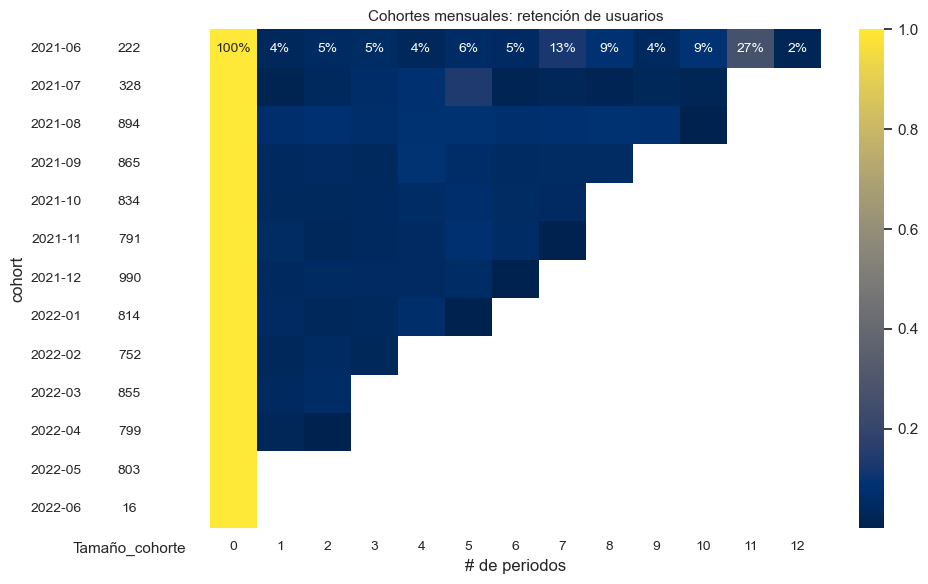

In [180]:
# Definiendo una función para asignar períodos existentes
# ==============================================================================
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Matriz de retención
    sns.heatmap(retencion_matrix_provincia,
                mask=retencion_matrix_provincia.isnull(),
                annot=True,
                fmt='.0%',
                cmap='cividis',
                ax=ax[1],
                annot_kws={"size": 10}) # Reduce el tamaño de los porcentajes
    ax[1].set_title('Cohortes mensuales: Retención de usuarios en Provincia', fontsize=11)
    ax[1].set(xlabel='# de periodos',
              ylabel='')
    ax[1].tick_params(axis='x', labelsize=10) # Reduce el tamaño de las letras del eje x
    ax[1].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y


    # Tamaño de cohorte
    cohort_size_df2 = pd.DataFrame(cohort_size2).rename(columns={0: 'Tamaño_cohorte'})

    white_cmap = mcolors.ListedColormap(['white'])

    sns.heatmap(cohort_size_df2,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0],
                annot_kws={"size": 10}) # Reduce el tamaño de los números en el tamaño del cohort
    ax[0].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y en el tamaño del cohort

    fig.tight_layout()

In [182]:
# Agrupando y contando clientes únicos en Provincia
# ==============================================================================
cohortes_pro_df = pd.DataFrame(oxford_provincia.groupby(['Year_mes'])['Cod_Cliente'].nunique()).reset_index()
cohortes_pro_df.columns = ['Year_mes', 'Total_clientes']

# Calculando nuevos clientes (igual que antes)
# ==============================================================================
cohortes_pro_df['Nuevos_clientes'] = cohortes_pro_df['Total_clientes'] - cohortes_pro_df['Total_clientes'].shift(1, fill_value=0)

# Calculate retention rates
# ==============================================================================
cohortes_retencion_df_pro = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohortes_retencion_df_pro = cohortes_retencion_df_pro.reset_index() # Restablecer el índice para convertir la 'cohorte' en una columna normal

cohortes_pro_df

,Year_mes,Total_clientes,Nuevos_clientes
0,2021-06,222,222
1,2021-07,336,114
2,2021-08,908,572
3,2021-09,951,43
4,2021-10,967,16
5,2021-11,962,-5
6,2021-12,1232,270
7,2022-01,1107,-125
8,2022-02,1067,-40
9,2022-03,1179,112


Aparentemente las gestiones de ventas se han realizado de mejor manera en las Provincias que en Lima, esto amerita un análisis más detallado con el método de segmentación de clientes por el RFM.